# HCFlow Online Demo on X8 Face Image SR (including comparison with SRFlow)

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2108.05301)
[![GitHub Stars](https://img.shields.io/github/stars/JingyunLiang/HCFlow?style=social)](https://github.com/JingyunLiang/HCFLow)
[![download](https://img.shields.io/github/downloads/JingyunLiang/HCFlow/total.svg)](https://github.com/JingyunLiang/HCFlow/releases)

This is a **HCFlow online demo on X8 face image SR** of our paper [''Hierarchical Conditional Flow: A Unified Framework for Image Super-Resolution and Image Rescaling, ICCV2021''](https://arxiv.org/abs/2108.05301). HCFlow achieves state-of-the-art performance on general image SR, face image SR and image rescaling in terms of both quantitative metrics and visual quality.

<img src="https://raw.githubusercontent.com/JingyunLiang/HCFlow/main/illustrations/face_result.png" width="100%">

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone HCFlow
import os
!git clone https://github.com/JingyunLiang/HCFlow.git
!pip install lpips

# Clone SRFlow for comparison
!git clone https://github.com/andreas128/SRFlow.git

# Download the pre-trained models
%cd HCFlow
!wget https://github.com/JingyunLiang/HCFlow/releases/download/v0.0/SR_CelebA_X8_HCFlow.pth -P experiments/pretrained_models
!wget https://github.com/JingyunLiang/HCFlow/releases/download/v0.0/SR_CelebA_X8_HCFlow++.pth -P experiments/pretrained_models
%cd ../SRFlow
!wget https://github.com/JingyunLiang/HCFlow/releases/download/v0.0/Z_RRDB_CelebA_8X_used_only_in_Colab_for_comparison.pth -P pretrained_models
!wget https://github.com/JingyunLiang/HCFlow/releases/download/v0.0/Z_SRFlow_CelebA_8X_used_only_in_Colab_for_comparison.pth -P pretrained_models
os.rename('pretrained_models/Z_RRDB_CelebA_8X_used_only_in_Colab_for_comparison.pth', 'pretrained_models/RRDB_CelebA_8X.pth')
os.rename('pretrained_models/Z_SRFlow_CelebA_8X_used_only_in_Colab_for_comparison.pth', 'pretrained_models/SRFlow_CelebA_8X.pth')
%cd ..

# copy example testing image from HCFlow to SRFlow
import os
import shutil
import glob
os.makedirs('SRFlow/datasets/celebA-validation-gt', exist_ok=True)
os.makedirs('SRFlow/datasets/celebA-validation-x8', exist_ok=True)
for gt_path, lr_path in zip(glob.glob(os.path.join('HCFlow/datasets/example_face_8X/HR', '*')), glob.glob(os.path.join('HCFlow/datasets/example_face_8X/LR', '*'))):
  shutil.copy(lr_path, 'SRFlow/datasets/celebA-validation-x8')
  shutil.copy(gt_path, 'SRFlow/datasets/celebA-validation-gt')

# 2. Inference


In [ ]:
# HCFlow
%cd HCFlow/codes
!python test_HCFlow.py --opt options/test/test_SR_CelebA_8X_HCFlow.yml
%cd ..
%cd ..

# SRFlow for comparison
%cd SRFlow/code
!python test.py confs/SRFlow_CelebA_8X.yml
%cd ..
%cd ..

# 3. Visualization

['HCFlow/datasets/example_face_8X/LR/16.png', 'HCFlow/datasets/example_face_8X/LR/36.png', 'HCFlow/datasets/example_face_8X/LR/110.png', 'HCFlow/datasets/example_face_8X/LR/217.png', 'HCFlow/datasets/example_face_8X/LR/253.png', 'HCFlow/datasets/example_face_8X/LR/334.png'] ['HCFlow/datasets/example_face_8X/HR/16.png', 'HCFlow/datasets/example_face_8X/HR/36.png', 'HCFlow/datasets/example_face_8X/HR/110.png', 'HCFlow/datasets/example_face_8X/HR/217.png', 'HCFlow/datasets/example_face_8X/HR/253.png', 'HCFlow/datasets/example_face_8X/HR/334.png'] ['HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/SR_16_0.8_0.png', 'HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/SR_36_0.8_0.png', 'HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/SR_110_0.8_0.png', 'HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/SR_217_0.8_0.png', 'HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/SR_253_0.8_0.png', 'HCFlow/results/002_HCFlow_CelebA_x8

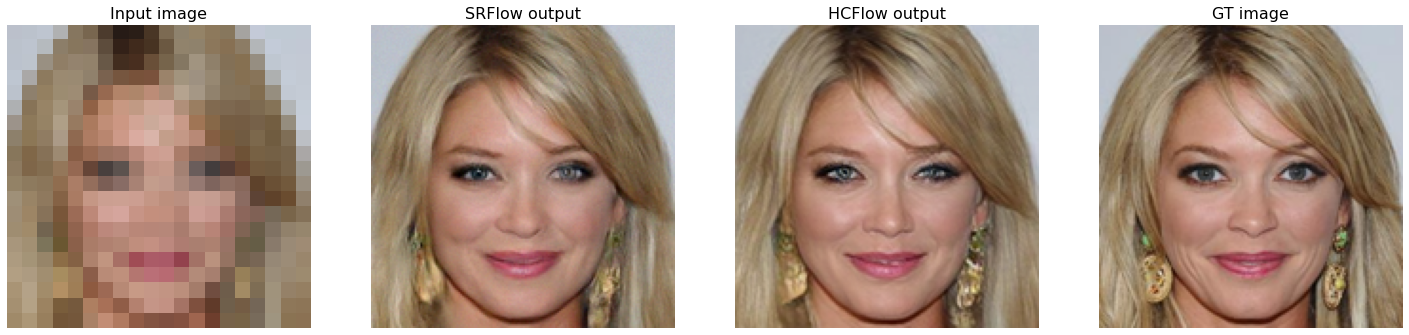

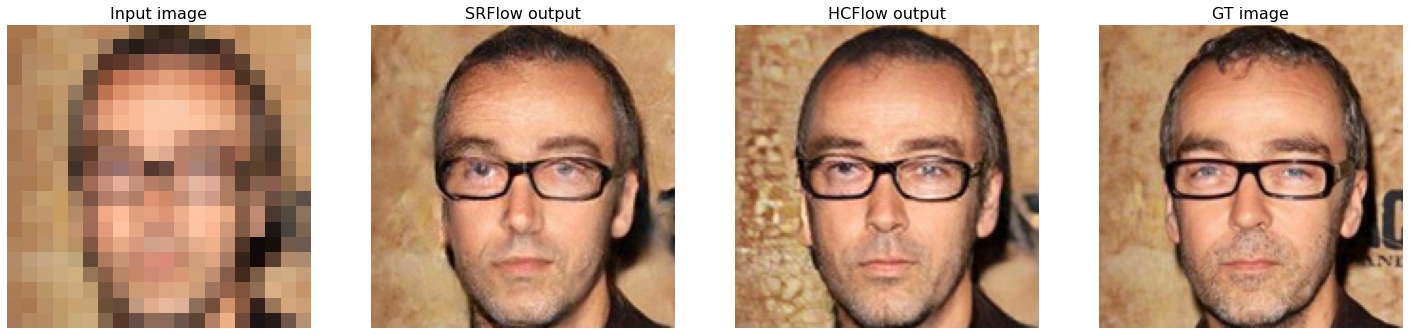

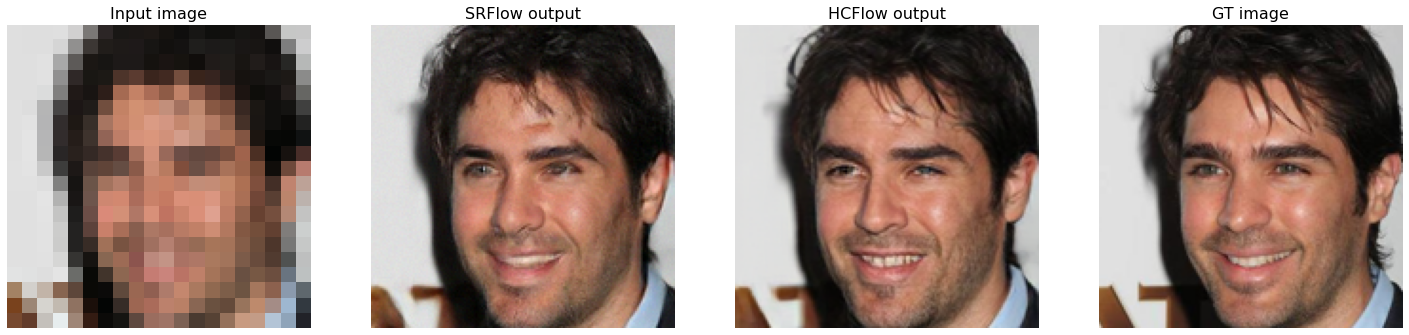

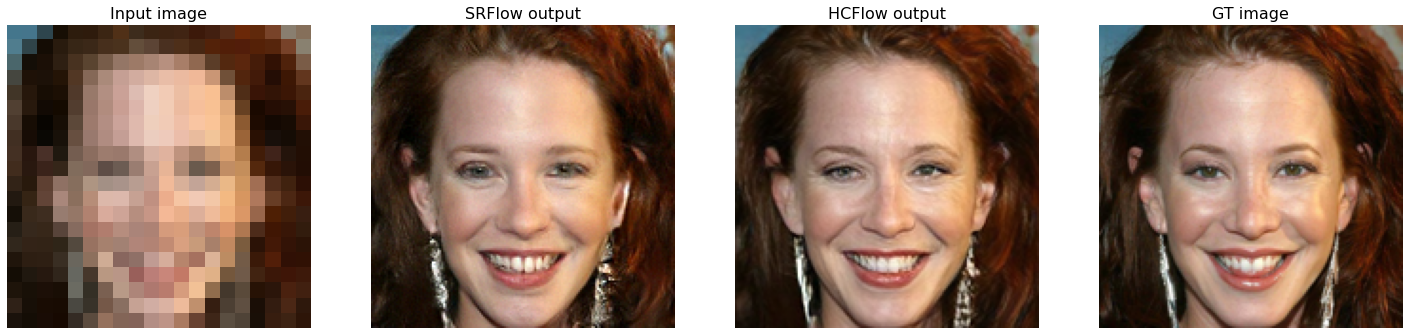

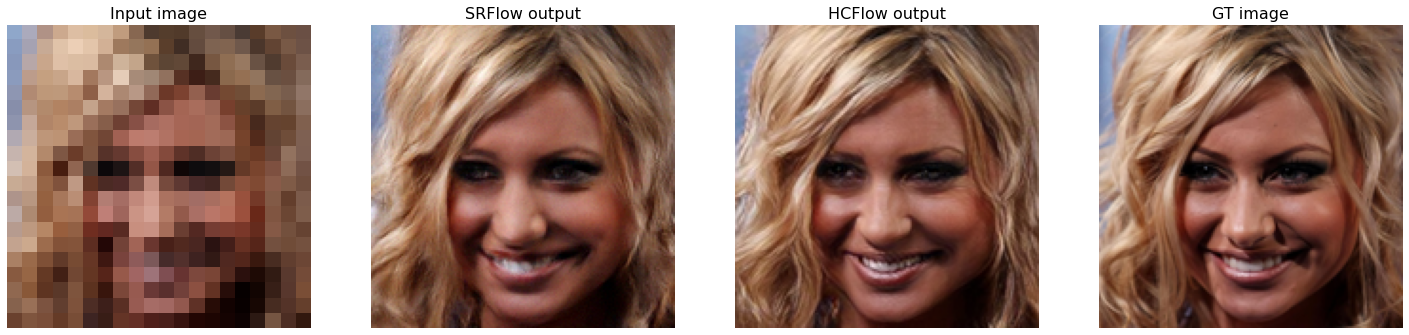

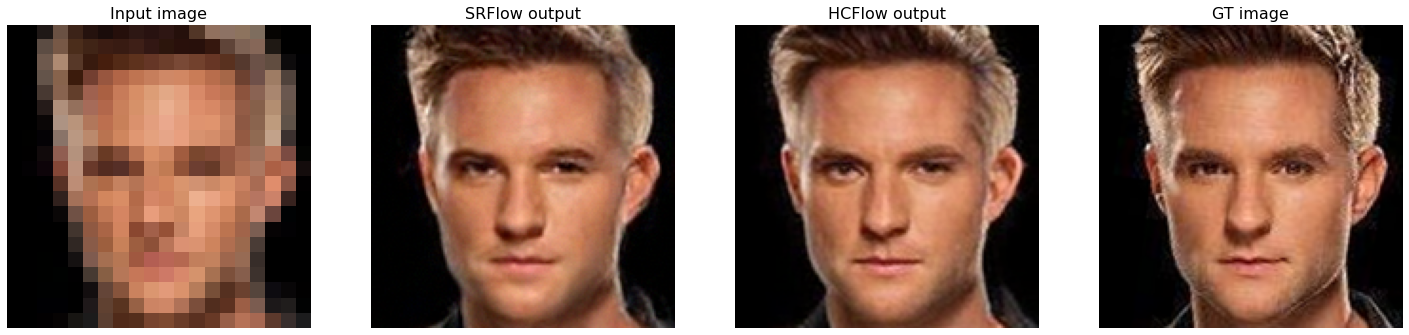

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2, img3, img4):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 4, 1)
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 4, 2)
  plt.title('SRFlow output', fontsize=16)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, 4, 3)
  plt.title('HCFlow output', fontsize=16)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, 4, 4)
  plt.title('GT image', fontsize=16)
  ax4.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
  ax3.imshow(img3)
  ax4.imshow(img4)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob
from natsort import natsort

lr_folder = 'HCFlow/datasets/example_face_8X/LR'
gt_folder = 'HCFlow/datasets/example_face_8X/HR'
hcflow_folder = 'HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X'
srflow_folder = 'SRFlow/results/SRFlow_CelebA_8X/090'
lr_list = natsort.natsorted(glob.glob(os.path.join(lr_folder, '*')))
gt_list = natsort.natsorted(glob.glob(os.path.join(gt_folder, '*')))
hcflow_list = natsort.natsorted(glob.glob(os.path.join(hcflow_folder, '*')))
for x in hcflow_list:
  if '0.0' in x:
    hcflow_list.remove(x)
srflow_list = natsort.natsorted(glob.glob(os.path.join(srflow_folder, '*')))
print(lr_list, gt_list, hcflow_list, srflow_list)
for lr_path, gt_path, hcflow_path, srflow_path in zip(lr_list, gt_list, hcflow_list, srflow_list):
  lr = imread(lr_path)
  srflow = imread(srflow_path)
  hcflow = imread(hcflow_path)
  gt = imread(gt_path)

  display(lr, srflow, hcflow, gt)

# 4. Download Results


In [ ]:
# Download the results
from google.colab import files
zip_filename = 'HCFlow_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} HCFlow/results/002_HCFlow_CelebA_x8_bicSR_test/example_face_8X/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>